In [1]:
import numpy as np
import cv2
import os
# from PIL import Image

In [2]:
folder_path = '/home/uss00067/Datasets/FDC_5/train/video_001/angry/level_3/001/000/0'
ref_path = os.path.join(folder_path, 'reference.png')
gt_path = os.path.join(folder_path, 'gt.png')
mask_path = os.path.join(folder_path, 'mask.npy')

In [4]:
ref_img = cv2.imread(ref_path) # BGR by deafault
ref_gray = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)
ref_gray = np.repeat(ref_gray[:,:,np.newaxis], 3, axis=2)

gt_img = cv2.imread(gt_path) # BGR by default
gt_gray = cv2.cvtColor(gt_img, cv2.COLOR_BGR2GRAY)
print('gt gray shape: ', gt_gray.shape)

dim = (ref_img.shape[1], ref_img.shape[0])  
# resize image
resized_gt_gray = cv2.resize(gt_gray, dim, interpolation = cv2.INTER_LINEAR)
resized_gt_gray= np.repeat(resized_gt_gray[:, :, np.newaxis], 3, axis=2)
print('resized gt gray shape: ', resized_gt_gray.shape)

mask_np = np.load(mask_path) # mask has the same shape as the ref image
print('mask np shape: ', mask_np.shape)

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


In [5]:
mask_np.shape
import matplotlib.pyplot as plt

plt.imshow(mask_np)
plt.show()

NameError: name 'mask_np' is not defined

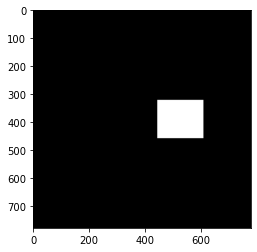

In [5]:
left_eye_mask = np.zeros(mask_np.shape)
left_eye_mask[mask_np==1]=1
left_eye_mask *= 255

left_eye_mask = np.repeat(left_eye_mask[:,:, np.newaxis], 3, axis=2)
left_eye_mask = left_eye_mask.astype(np.uint8)
plt.imshow(left_eye_mask)
plt.show()

In [6]:
def compute_mid_pt(area_idx):
    v_min = np.min(area_idx[0])
    v_max = np.max(area_idx[0])
    u_min = np.min(area_idx[1])
    u_max = np.max(area_idx[1])
    
    mid_v = int((v_min+v_max)/2)
    mid_u = int((u_min+u_max)/2)
    
    # This order cannot be reversed. Otherwise the seamlessclone function will be wrong
    return mid_u, mid_v

In [7]:
left_eye_area = np.where(left_eye_mask==255)
print('left eye area: ', left_eye_area)
left_eye_pt = compute_mid_pt(left_eye_area)
print('Mid pt of left eye: ', left_eye_pt)

left eye area:  (array([321, 321, 321, ..., 457, 457, 457]), array([444, 444, 444, ..., 608, 608, 608]), array([0, 1, 2, ..., 0, 1, 2]))
Mid pt of left eye:  (526, 389)


whole center:  (412, 545)


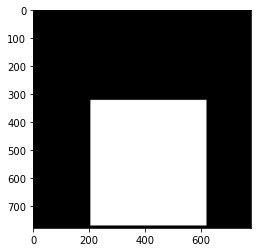

In [41]:
whole_face_area = np.where(mask_np!=-1)
whole_v_min = np.min(whole_face_area[0])
whole_v_max = np.max(whole_face_area[0])
whole_u_min = np.min(whole_face_area[1])
whole_u_max = np.max(whole_face_area[1])

whole_mask = np.zeros(mask_np.shape)
whole_mask[whole_v_min:whole_v_max, whole_u_min:whole_u_max] = 1
whole_mask *= 255

whole_center = (int((whole_u_min+whole_u_max)/2), int((whole_v_min+whole_v_max)/2))
# whole_center = (int((whole_v_min+whole_v_max)/2), int((whole_u_min+whole_u_max)/2))

print('whole center: ', whole_center)
whole_mask = np.repeat(whole_mask[:,:,np.newaxis], 3, axis=2)
whole_mask = whole_mask.astype(np.uint8)
plt.imshow(whole_mask)
plt.show()

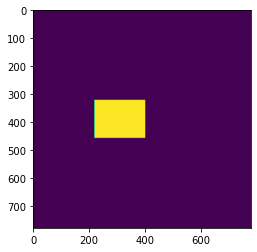

In [8]:
right_eye_mask = np.zeros(mask_np.shape)
right_eye_mask[mask_np==2]=1
right_eye_mask *= 255
plt.imshow(right_eye_mask)
plt.show()

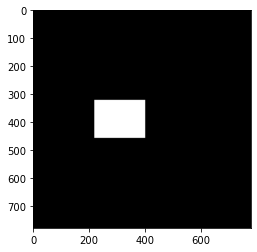

In [9]:
right_eye_mask = np.zeros(mask_np.shape)
right_eye_mask[mask_np==2]=1
right_eye_mask *= 255

right_eye_mask = np.repeat(right_eye_mask[:,:, np.newaxis], 3, axis=2)
right_eye_mask = right_eye_mask.astype(np.uint8)
plt.imshow(right_eye_mask)
plt.show()

In [10]:
right_eye_area = np.where(right_eye_mask==255)
print('right eye area: ', right_eye_area)
right_eye_pt = compute_mid_pt(right_eye_area)
print('Mid pt of right eye: ', right_eye_pt)

right eye area:  (array([321, 321, 321, ..., 456, 456, 456]), array([219, 219, 219, ..., 400, 400, 400]), array([0, 1, 2, ..., 0, 1, 2]))
Mid pt of right eye:  (309, 388)


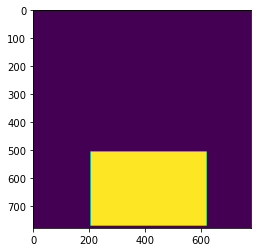

In [11]:
mouth_mask = np.zeros(mask_np.shape)
mouth_mask[mask_np==3] = 1
mouth_mask *= 255
plt.imshow(mouth_mask)
plt.show()

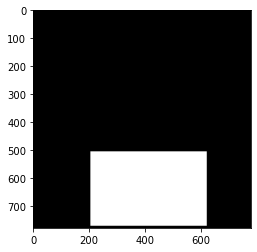

In [12]:
mouth_mask = np.zeros(mask_np.shape)
mouth_mask[mask_np==3]=1
mouth_mask *= 255

mouth_mask = np.repeat(mouth_mask[:,:, np.newaxis], 3, axis=2)
mouth_mask = mouth_mask.astype(np.uint8)
plt.imshow(mouth_mask)
plt.show()

In [13]:
mouth_area = np.where(mouth_mask==255)
print('mouth eye area: ', mouth_area)
mouth_pt = compute_mid_pt(mouth_area)
print('Mid pt of mouth: ', mouth_pt)

mouth eye area:  (array([505, 505, 505, ..., 770, 770, 770]), array([205, 205, 205, ..., 620, 620, 620]), array([0, 1, 2, ..., 0, 1, 2]))
Mid pt of mouth:  (412, 637)


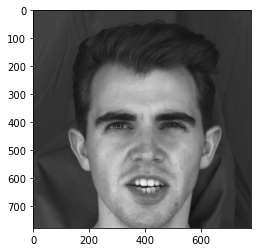

In [14]:
plt.imshow(resized_gt_gray)
plt.show()

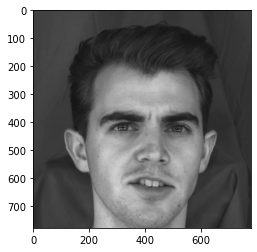

In [16]:
plt.imshow(ref_gray)
plt.show()

ref_img data type:  uint8
gt data type:  uint8
mask data type:  uint8
max value in mask:  255
Time for left:  0.07406902313232422


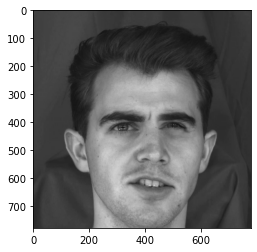

In [17]:
print('ref_img data type: ', ref_img.dtype)
print('gt data type: ', resized_gt_gray.dtype)
print('mask data type: ', left_eye_mask.dtype)
print('max value in mask: ', np.max(left_eye_mask))

import time

t1 = time.time()
# wtf = cv2.seamlessClone(resized_gt_gray, ref_gray, left_eye_mask, left_eye_pt, cv2.MONOCHROME_TRANSFER)
wtf = cv2.seamlessClone(resized_gt_gray, ref_img, left_eye_mask, left_eye_pt, cv2.MONOCHROME_TRANSFER)
t2 = time.time()
print('Time for left: ', t2-t1)

result = cv2.cvtColor(wtf, cv2.COLOR_BGR2RGB)
plt.imshow(result)
plt.show()

Time for right:  0.04828929901123047


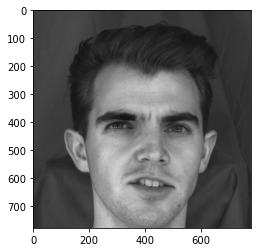

In [18]:
t3 = time.time()
wtf_1 = cv2.seamlessClone(resized_gt_gray, ref_gray, right_eye_mask, right_eye_pt, cv2.MONOCHROME_TRANSFER)
t4 = time.time()
print('Time for right: ', t4-t3)
result_1 = cv2.cvtColor(wtf_1, cv2.COLOR_BGR2RGB)
plt.imshow(result_1)
plt.show()

Time for mouth:  0.18668580055236816


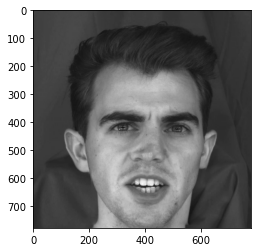

In [19]:
t5 = time.time()
wtf_2 = cv2.seamlessClone(resized_gt_gray, ref_gray, mouth_mask, mouth_pt, cv2.MONOCHROME_TRANSFER)
t6 = time.time()
print('Time for mouth: ', t6-t5)

result_2 = cv2.cvtColor(wtf_2, cv2.COLOR_BGR2RGB)
plt.imshow(result_2)
plt.show()

Time for mouth:  0.12955975532531738


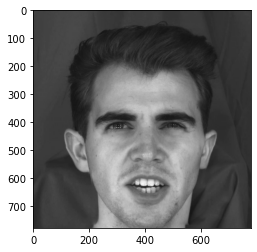

In [42]:
t7 = time.time()
wtf_3 = cv2.seamlessClone(resized_gt_gray, ref_gray, whole_mask, whole_center, cv2.MONOCHROME_TRANSFER)
t8 = time.time()
print('Time for mouth: ', t8-t7)

result_3 = cv2.cvtColor(wtf_3, cv2.COLOR_BGR2RGB)
plt.imshow(result_3)
plt.show()

Mask shape:  (500, 500)
Mask data type:  uint8
center:  (389, 389)
1.8202974796295166
(779, 779, 3)


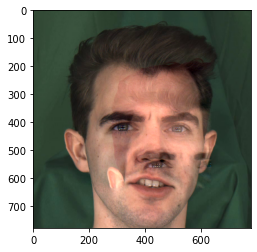

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images : src image will be cloned into dst
dst = cv2.imread(ref_path)
obj= cv2.imread(gt_path)

dim = (dst.shape[1], dst.shape[0])  
# resize image
obj = cv2.resize(obj, dim, interpolation = cv2.INTER_LINEAR)

# Create an all white mask
mask = 255 * np.ones((500, 500), obj.dtype)
print('Mask shape: ', mask.shape)
print('Mask data type: ', mask.dtype)

# The location of the center of the src in the dst
width, height, channels = dst.shape
center = (int(height/2), int(width/2))

import time

t1 = time.time()
# Seamlessly clone src into dst and put the results in output
print('center: ', center)
normal_clone = cv2.seamlessClone(obj, dst, mask, center, cv2.MIXED_CLONE)
t2 = time.time()
print(t2-t1)

print(normal_clone.shape)

result_show = cv2.cvtColor(normal_clone, cv2.COLOR_BGR2RGB)
plt.imshow(result_show)
plt.show()